In [1]:
"""Mariu Viloria
November 24, 2020
"""





# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import sklearn.linear_model

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = '/Users/mariuviloria/Desktop/MACHINE LEARNING/birthweight_low.xlsx'


# reading the file into Python
birth = pd.read_excel(io=file, sheet_name=0)


# outputting the first ten rows of the dataset
birth.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


# Classifying Variables and Flagging Missing Values

Understanding our Data, and missing values as a first step.

CONTINUOUS
----------
mage
fage
bwght

INTERVAL/COUNT
--------------
monpre
npvis
drink
cigs
feduc
meduc

CATEGORICAL/OTHER
-----------------
male
mwhte
fwhte
mblck
fblck
moth
foth

**NOT USED FOR THIS MODEL** as these happen after the baby is born. It is not useful for the prediction model. 
Omaps
Fmaps


In [3]:
#loop to FLAG MISSING VALUES

for col in birth:

    # creating columns with 1s if missing and 0 if not
    if birth[col].isnull().astype(int).sum() > 0:
        birth['m_'+col] = birth[col].isnull().astype(int)
birth.iloc[:, -3:].sum(axis=0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

Missing values are within 3 Interval/Count data, evaluating these 3 variables 
independently to understand which value to fill in with. We are making a new data frame
without the missing values to evaluate which measure to use to fill in missing values.

In [4]:
# the following code makes the new DataFrame independent, we are making a copy
df_dropped = pd.DataFrame.copy(birth)


# using dropna() for df_dropped  , it will delete the whole observation
df_dropped = df_dropped.dropna().round(2)


# checking to see if all missing values have been dropped
print(df_dropped.isnull().sum())


mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64


In [5]:
df_dropped.describe(include='number').round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.0,186.0,186.0
mean,39.99,13.94,2.25,11.75,39.38,13.81,8.24,8.98,10.91,5.45,0.54,0.28,0.37,0.35,0.36,0.35,0.29,3329.23,0.0,0.0,0.0
std,10.22,2.06,1.21,4.23,8.97,2.63,1.56,0.64,6.04,2.98,0.50,0.45,0.48,0.48,0.48,0.48,0.46,621.40,0.0,0.0,0.0
min,23.00,8.00,1.00,3.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1290.00,0.0,0.0,0.0
25%,33.00,12.00,2.00,10.00,35.00,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2901.25,0.0,0.0,0.0
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3435.00,0.0,0.0,0.0
75%,45.75,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.00,7.75,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3745.00,0.0,0.0,0.0
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,0.0,0.0,0.0


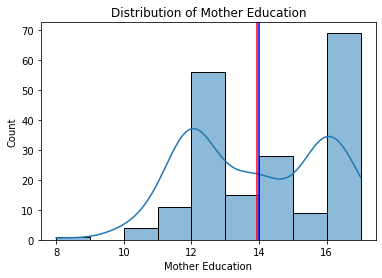

In [6]:
#create a visualization for variable
sns.histplot(data   = birth,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mother Education")
plt.xlabel(xlabel = "Mother Education") 
plt.ylabel(ylabel = "Count")

#understand mean and median variance
plt.axvline(x = df_dropped['meduc'].mean(),
            color = 'red')


plt.axvline(x = df_dropped['meduc'].median(),
            color = 'blue')


# displaying the histogram
plt.show()

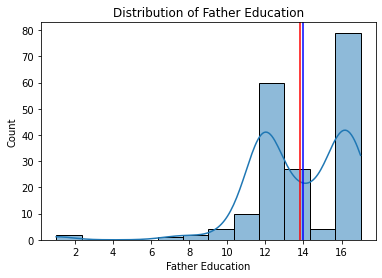

In [7]:
#create a visualization for variable

sns.histplot(data   = birth,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Father Education")
plt.xlabel(xlabel = "Father Education") 
plt.ylabel(ylabel = "Count")

#understand mean and median variance
plt.axvline(x = df_dropped['feduc'].mean(),
            color = 'red')


plt.axvline(x = df_dropped['feduc'].median(),
            color = 'blue')
# displaying the histogram
plt.show()

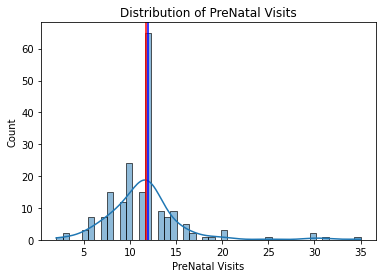

In [8]:
#create a visualization for variable

sns.histplot(data   = birth,
          x      = 'npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of PreNatal Visits")
plt.xlabel(xlabel = "PreNatal Visits") 
plt.ylabel(ylabel = "Count")

#understand mean and median variance
plt.axvline(x = df_dropped['npvis'].mean(),
            color = 'red')


plt.axvline(x = df_dropped['npvis'].median(),
            color = 'blue')
# displaying the histogram
plt.show()

There is not much variance between mean and median for any of these variables, however feduc and meduc present some little skewness to the left and npvis to the right, I choose to fill in the values with the **median()** of each feature. 

# Replace missing Values

In [9]:
#replacing missing values with median 
miss_feduc= birth['feduc'].median()

birth.loc[:,'feduc'].fillna(value=miss_feduc , inplace=True)

#double check missing values where replaced
birth.loc[:,'feduc'].isnull().sum(axis=0)

0

In [10]:
#replacing missing values with median

miss_npvis= birth['npvis'].median()
birth.loc[:,'npvis'].fillna(value=miss_npvis,inplace=True )

#double check missing values where replaced
birth.loc[:,'npvis'].isnull().sum(axis=0)

0

In [11]:
#replacing missing values with median
miss_meduc= birth['meduc'].median()
birth.loc[:,'meduc'].fillna(value=miss_meduc,inplace=True )

#double check missing values where replaced

birth.loc[:,'meduc'].isnull().sum(axis=0)

0

In [12]:
#Double checking all null values have been filled in.
birth.isnull().any()

mage       False
meduc      False
monpre     False
npvis      False
fage       False
feduc      False
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
dtype: bool

In [13]:
#Reassessing DataFrame description after changes.
birth.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.913265,2.341837,11.607143,39.290816,13.852041,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,0.015306,0.015306,0.035714
std,10.250055,2.040017,1.355136,4.234625,8.982725,2.586661,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,0.123082,0.123082,0.186052
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,0.000000,0.000000,0.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,0.000000,0.000000,0.000000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,0.000000,0.000000,0.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,0.000000,0.000000,0.000000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,1.000000,1.000000,1.000000


# Handling data already cleaned. 

Look at histograms to understand possible high skewness and evaluate 
opportunities of log transforming of continuous variables.

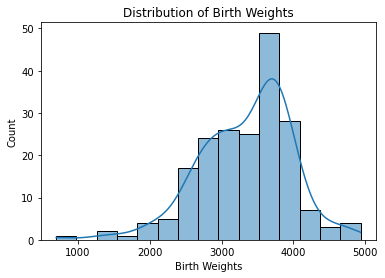

In [14]:
#create a visualization for Target variable distribution
sns.histplot(data   = birth,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Birth Weights")
plt.xlabel(xlabel = "Birth Weights")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [15]:
# log transforming Birthweight and saving it to the dataset
birth['log_bwght'] = np.log(birth['bwght'])

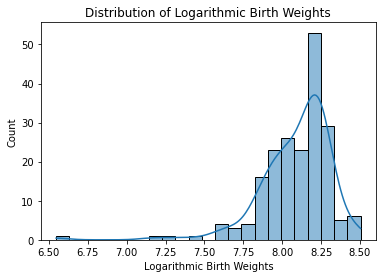

In [16]:
#create a visualization for logarithmic variable version
sns.histplot(data   = birth,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Logarithmic Birth Weights")
plt.xlabel(xlabel = "Logarithmic Birth Weights") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

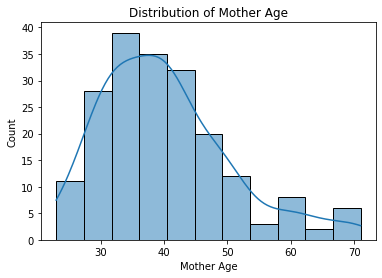

In [17]:
#create a visualization for variable
sns.histplot(data   = birth,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mother Age")
plt.xlabel(xlabel = "Mother Age")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [18]:
# log transforming Mother Age and saving it to the dataset
birth['log_mage'] = np.log(birth['mage'])

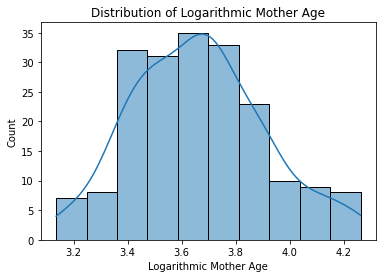

In [19]:
#create a visualization for Logarithmic version of variable
sns.histplot(data   = birth,
          x      = 'log_mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Logarithmic Mother Age")
plt.xlabel(xlabel = "Logarithmic Mother Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

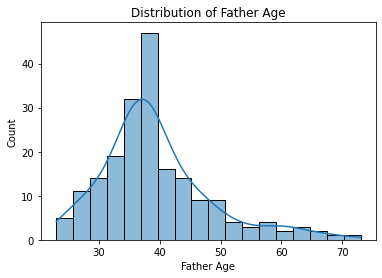

In [20]:
#create a visualization for variable
sns.histplot(data   = birth,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Father Age")
plt.xlabel(xlabel = "Father Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [21]:
# log transforming Father Age and saving it to the dataset
birth['log_fage'] = np.log(birth['fage'])

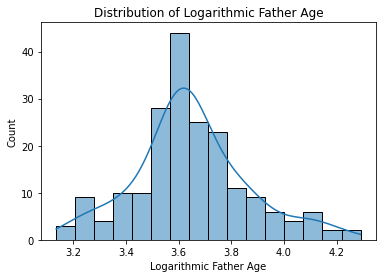

In [22]:
#create a visualization for Logarithmic version of variable

sns.histplot(data   = birth,
          x      = 'log_fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Logarithmic Father Age")
plt.xlabel(xlabel = "Logarithmic Father Age") # avoiding using dataset labels, instead use understandable labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [23]:
# Evaluating correlation of original and log version
log_corr = birth.loc[ : , ['mage', 'log_mage',
                           'fage','log_fage',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr

,mage,log_mage,fage,log_fage,bwght,log_bwght
mage,1.00,0.99,0.58,0.55,-0.46,-0.50
log_mage,0.99,1.00,0.56,0.53,-0.42,-0.44
fage,0.58,0.56,1.00,0.99,-0.40,-0.41
log_fage,0.55,0.53,0.99,1.00,-0.38,-0.39
bwght,-0.46,-0.42,-0.40,-0.38,1.00,0.97
log_bwght,-0.50,-0.44,-0.41,-0.39,0.97,1.00


Original variables graph present little skewness that could impact the performance 
of the model. Logarithmic versions of these variables could improve this issue.

Correlation remains stronger using original versions of the variables.


# Visualizing correlations with scatterplot

Visualize each continuous variable interaction with the Target variable with Scatterplots of original 
and logarithmic versions of the continuous variables.

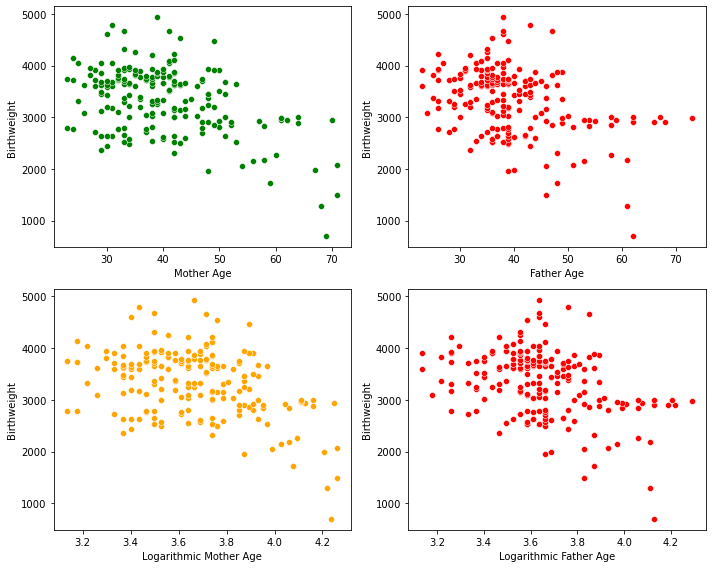

<Figure size 432x288 with 0 Axes>

In [24]:
########################
# Visual EDA (Scatterplots) of CONTINOUS VARIABLES
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birth['mage'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birth['fage'],
                y = birth['bwght'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Father Age')
plt.ylabel(ylabel = 'Birthweight')

########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birth['log_mage'],
               y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Logarithmic Mother Age')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birth['log_fage'],
                y = birth['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Logarithmic Father Age')
plt.ylabel(ylabel = 'Birthweight')


# cleaning up the layout and displaying
plt.tight_layout()
plt.show()


# cleaning up the layout and displaying
plt.tight_layout()
plt.show()

In [25]:
# Percentage of mother 50+ years 
print (f""" Mother obervations with more than 35 years {((len(birth['mage']
            [birth['mage'] >35 ])/196)*100) }  %""")



 Mother obervations with more than 35 years 62.755102040816325  %


In [26]:
# Percentage of father 43+ years 
print (f""" Father obervations with more than 40 years {((len(birth['fage']
[birth['fage'] >40 ])/196)*100) }  %""")


 Father obervations with more than 40 years 32.142857142857146  %


The scatterplots allow us to understand the behavior of Age factor around Birth weight. Looking at mothers Age graph, birth weights varies consistently without clear pattern until it reaches around 45 years of age, where we can see that birth weights decreases consistently until reaching 50+ age when baby weights drop to under 3000grs. This could be associated to the increase of risks and pregnancy complications after age 45 in women.^

Healthy weight for a baby at birth (2700 grs - 4000 grs).

For Fathers age, the pattern is repeated but in this case we can see that lower weights appear more frequently 
after ages around 40 years old. Indicating a potential decrease in quality of fathers fertility and quality of esperma.

The amount of observations under these ages for man and women are significant to be considered a trend for these variables.

^https://www.acog.org/womens-health/faqs/having-a-baby-after-age-35-how-aging-affects-fertility-and-pregnancy#:~:text=A%20woman's%20peak%20reproductive%20years,is%20unlikely%20for%20most%20women.

# Evaluating Count/Interval data.

**MONTH WHEN PRENATAL CARE BEGINS**

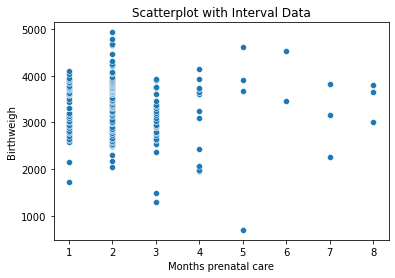

In [27]:
# developing a scatterplot
sns.scatterplot(x    = 'monpre',
                y    = 'bwght',
                data = birth)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Months prenatal care')
plt.ylabel(ylabel = 'Birthweigh')


# displaying the plot
plt.show()

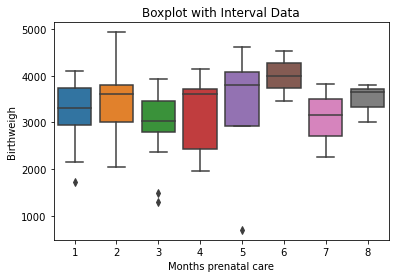

In [28]:
# developing a boxplot
sns.boxplot(x    = 'monpre',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Months prenatal care')
plt.ylabel(ylabel = 'Birthweigh')


# displaying the plot
plt.show()

In [29]:
# Evaluating correlation of original
log_corr = birth.loc[ : , ['monpre',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr.loc[ ['monpre'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
monpre,-0.05,-0.09


Box plot for Months of prenatal care begin, shows a high variability, difference in concentration and skewness of the data, also some few outliers found to be investigated further. Its important to understand that pre natal care begins as soon as mother find out about their pregnancies, in many cases women don't find out until delivery time and delivering healthy baby withing normal weight ranges. 

Correlation with target variable is very low.  

Due to these previous factors I don't consider transforming this variable.

**NUMBER OF PRENATAL VISITS**

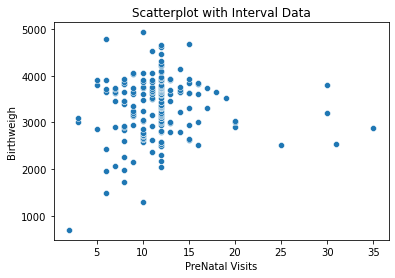

In [30]:
# developing a scatterplot
sns.scatterplot(x    = 'npvis',
                y    = 'bwght',
                data = birth)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'PreNatal Visits')
plt.ylabel(ylabel = 'Birthweigh')


# displaying the plot
plt.show()

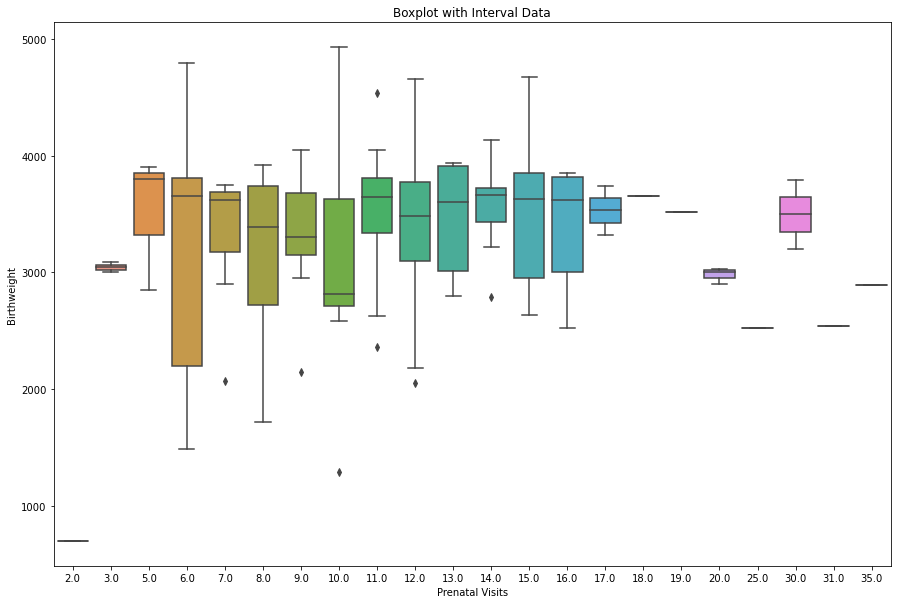

In [31]:
fig, ax = plt.subplots(figsize = (15, 10))

# developing a boxplot
sns.boxplot(x    = 'npvis',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

In [32]:
# printing value counts for full and half baths
print(f"""
Count of pre visits
==================

----------
Prenatal Visits numb
----------
{birth['npvis'].value_counts(normalize = False).sort_index()}


""")


Count of pre visits

----------
Prenatal Visits numb
----------
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    68
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name: npvis, dtype: int64





The plot shows there is bigger concentration of data between 5 and 15 prenatal visits, but there is hight variability  with weight. The number of pre visits depend in mothers overall health, if mother is within a high risk group, like Age, underlying health conditions. We could infer that is a mother of high risk pregnancy would have more visits than one who doesn't and also a high risk pregnancy has more probabilities of having a baby out of the normal weight range, this could be one reason for some of the outliers we see. 

However the graph suggest that the number of visits have not a strong relation with baby weights and there is also low amount of data under higher number of pre vistis that are influencing this conclusion.

Normal prenatal visits are between 5 and 14. 

In [33]:
# Evaluating correlation of original and log version
log_corr = birth.loc[ : , ['npvis',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr.loc[ ['npvis'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
npvis,0.06,0.11


 **DRINKS PER WEEK**

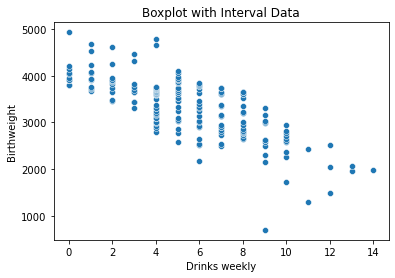

In [34]:
# developing a boxplot
sns.scatterplot(x    = 'drink',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Drinks weekly')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

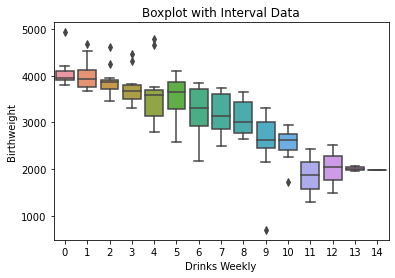

In [35]:
# developing a boxplot
sns.boxplot(x    = 'drink',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Drinks Weekly')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

In [36]:
# printing value counts drinks
print(f"""
Count of Drinks > 6
==================
{(birth['drink']>6).sum()}
""")


Count of Drinks > 6
68



Drinks per week show an evident negative correlation with birth weight, we can see the higher number of drinks per week, the lower the birth weight. Although not necessarily meaning that the weights are out of the 'safe' threshold of healthy baby weight, it is evident that it negatively correlated, and than weights are affected by the amount of drinks.

The graph suggests that the trend is more accentuated when the amount of drinks goes over 6 (up to 5 glasses are considered low consumption, and from 6 and up glasses moderate to high). There are 68 observations with more than 6 drinks which represents 35% of the data for this category  and is recommended to further understand with correlation evaluation.

So I would conclude that for moderate to high alcohol consumption during pregnancy the birth weight could be negatively affected.

^https://utswmed.org/medblog/alcohol-during-pregnancy/


^https://www.health.harvard.edu/blog/study-no-connection-between-drinking-alcohol-early-in-pregnancy-and-birth-problems-201309106667


In [37]:
# Evaluating correlation of original and log version
log_corr = birth.loc[ : , ['drink',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr.loc[ ['drink'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
drink,-0.74,-0.7


When applied logarithmic version of the variable there is not significant improvement, as the plots above suggested there was clear relationship between target and explanatory variable. 
After confirming with correlation evaluation, the conclusion is to keep original version of explanatory variable for the model.

**CIGARS DAILY**

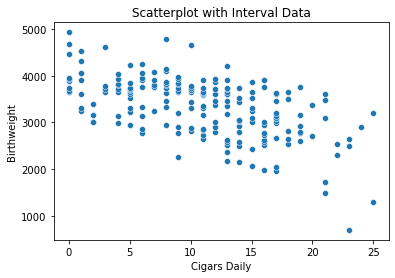

In [38]:
# developing a scatterplot
sns.scatterplot(x    = 'cigs',
                y    = 'bwght',
                data = birth)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Cigars Daily')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

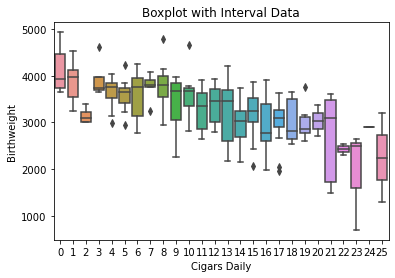

In [39]:
# developing a boxplot
sns.boxplot(x    = 'cigs',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Cigars Daily')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

In [40]:
birth['cigs'].value_counts(sort=True).sort_index()

0      9
1      8
2      4
3      4
4      8
5     11
6      9
7      5
8     11
9     11
10    10
11    13
12     9
13    15
14    11
15     9
16    11
17    12
18     5
19     6
20     2
21     5
22     2
23     3
24     1
25     2
Name: cigs, dtype: int64

In [41]:
# printing value counts drinks
print(f"""
Count of Cigars < 7
==================
{(birth['cigs']<7).sum()}
""")


Count of Cigars < 7
53



In [42]:
# printing value counts drinks
print(f"""
Count of Cigars > 17
==================
{(birth['cigs']>17).sum()}
""")


Count of Cigars > 17
26



In [43]:
# Evaluating correlation of original and log version
corr = birth.loc[ : , ['cigs',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

corr.loc[ ['cigs'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
cigs,-0.57,-0.55


With high noise in the graph it is still easy to see the negative correlation between cigars per day and baby weight.

When looking at boxes for 8 cigars, 15 cigars and 17 cigars where the bulk of the data is, it is much easier to understand how the average weights decrease as the amount of cigars augments.  



^https://bmcpregnancychildbirth.biomedcentral.com/articles/10.1186/s12884-018-1694-4

Cigars variable is highly negative with the target variable. This also confirms that the variable should be used in the model.

**MOTHER EDUCATION**

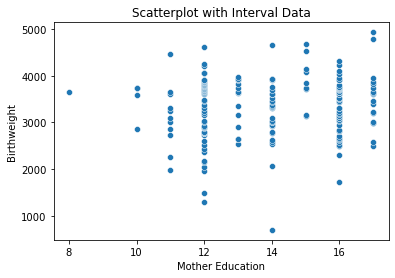

In [44]:
# developing a scatterplot
sns.scatterplot(x    = 'meduc',
                y    = 'bwght',
                data = birth)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Mother Education')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

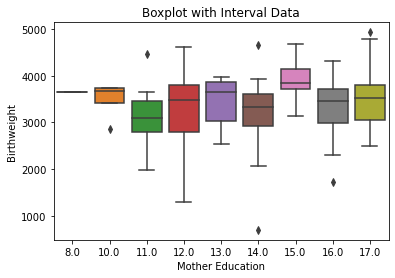

In [45]:
# developing a boxplot
sns.boxplot(x    = 'meduc',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Mother Education')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

Mothers Education seem to not have clear pattern when evaluating plots, although research shows that birth weight increase with mother education^. 

When assessing boxes for 11 years of education, 14 and 17 we could say there is some improvement on average weights, however this conclusion has to be investigated further due to the large variability in the data.

It is important to remember that most women will have their babies between 25-35 years old, and therefore this age range also influences the amount of years of education the women has had by the time they become pregnant.  

^https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3578151/

In [46]:
#assesing if changing to logarithmic can further improve the correlation
#changing variable tologarithmic
birth['log_meduc'] = np.log(birth['meduc'])

#assessing correlation
log_corr = birth.loc[ : , ['meduc',
                             'log_meduc',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['meduc', 'log_meduc'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
meduc,0.09,0.09
log_meduc,0.09,0.09


Correlation of both versions of the variable show there is very low positive correlation
amongst target and explanatory variable.

**FATHER EDUCATION**

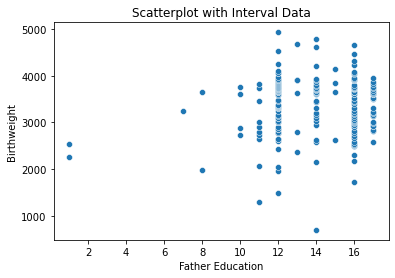

In [47]:
# developing a scatterplot
sns.scatterplot(x    = 'feduc',
                y    = 'bwght',
                data = birth)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

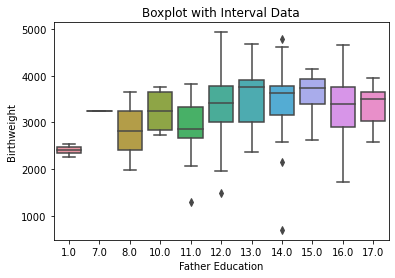

In [48]:
# developing a boxplot
sns.boxplot(x    = 'feduc',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

In [49]:
birth['feduc'].value_counts(sort=True).sort_index()

1.0      2
7.0      1
8.0      2
10.0     4
11.0    10
12.0    60
13.0     6
14.0    28
15.0     4
16.0    53
17.0    26
Name: feduc, dtype: int64

In the case of father level of education, there is also high variability in data however we could say that 
it is more clear a positive correlation between father education and birth weight than it was in case of the
mothers education years. We can see the pattern when looking at boxes 8, 12 and 15. However the dimensions of the box plots whiskers and the outliers impact this conclusion.

In [50]:
#assesing if changing to logarithmic can further improve the correlation
#changing variable tologarithmic
birth['log_feduc'] = np.log(birth['feduc'])

#assessing correlation
log_corr = birth.loc[ : , ['feduc',
                             'log_feduc',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['feduc', 'log_feduc'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
feduc,0.13,0.13
log_feduc,0.16,0.16


We can see from the correlation that Father education is higher correlated to birth weight 
than the mothers education. And also that using the logarithmic version of the explanatory
variable improves the correlation even more. 

# Evaluating Categorical Data

In [51]:
# printing columns
print(f"""
Baby is Male
------
{birth['male'].value_counts()}


Mother White
----------
{birth['mwhte'].value_counts()}


Father White
-------------
{birth['fwhte'].value_counts()}


Mother Black
----------
{birth['mblck'].value_counts()}


Father Black
-------------
{birth['fblck'].value_counts()}


Mother Other
----------
{birth['moth'].value_counts()}


Father Other
-------------
{birth['foth'].value_counts()}


""")


Baby is Male
------
1    108
0     88
Name: male, dtype: int64


Mother White
----------
0    143
1     53
Name: mwhte, dtype: int64


Father White
-------------
0    128
1     68
Name: fwhte, dtype: int64


Mother Black
----------
0    121
1     75
Name: mblck, dtype: int64


Father Black
-------------
0    129
1     67
Name: fblck, dtype: int64


Mother Other
----------
0    128
1     68
Name: moth, dtype: int64


Father Other
-------------
0    135
1     61
Name: foth, dtype: int64





The variables are already in the form of dummies, and most of them contain the threshold amount 
of more than 60 observations. Double checking in correlations to understand which are significant 
to keep for the model.

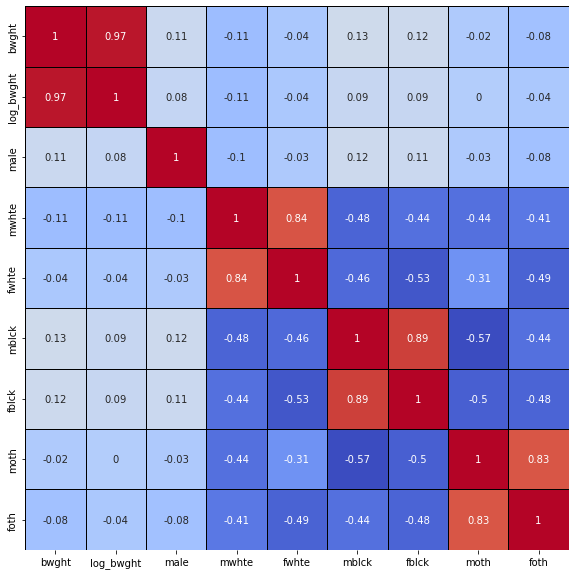

In [52]:
# correlation heatmap

df_corr = birth.corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))


# limiting the size of the correlation matrix
df_corr2 = df_corr.loc[ ['bwght', 'log_bwght', 'male',
                         'mwhte', 'fwhte', 'mblck', 'fblck',
                        'moth', 'foth'],
                      ['bwght', 'log_bwght', 'male',
                         'mwhte', 'fwhte', 'mblck', 'fblck',
                        'moth', 'foth']]


# visualizing the correlation matrix
sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

plt.show()

There is high correlation between parents of same race, this is obvious as these variables are the result of the gender category that has been turned into dummy form. We could only keep one of each in case they show important significance to our model. 

The correlation matrix shows that the stronger correlations amongst categorical variables with weight are:
-Positive correlation between race features when mother and father are black 0.13 and 0.12, I keep only one since both mother and father same race are very correlated. 
-Negative correlation when mother is white -0.11. 
-Baby being male positive correlation 0.11

For the model I'm keeping only this features mentioned above.


COMPARE CORRELATIONS 

In [53]:
# creating a (Pearson) correlation matrix
df_corr = birth.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght        1.00
log_bwght    0.97
omaps        0.25
fmaps        0.25
log_feduc    0.16
feduc        0.13
mblck        0.13
fblck        0.12
male         0.11
log_meduc    0.09
meduc        0.09
npvis        0.06
m_npvis      0.06
m_feduc     -0.00
moth        -0.02
fwhte       -0.04
monpre      -0.05
foth        -0.08
mwhte       -0.11
m_meduc     -0.13
log_fage    -0.38
fage        -0.40
log_mage    -0.42
mage        -0.46
cigs        -0.57
drink       -0.74
Name: bwght, dtype: float64


In [54]:
# creating a (Pearson) correlation matrix
df_corr = birth.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_bwght'].sort_values(ascending = False))

log_bwght    1.00
bwght        0.97
fmaps        0.32
omaps        0.31
log_feduc    0.16
feduc        0.13
npvis        0.11
meduc        0.09
log_meduc    0.09
fblck        0.09
mblck        0.09
male         0.08
m_npvis      0.06
moth         0.00
fwhte       -0.04
foth        -0.04
m_feduc     -0.09
monpre      -0.09
mwhte       -0.11
m_meduc     -0.24
log_fage    -0.39
fage        -0.41
log_mage    -0.44
mage        -0.50
cigs        -0.55
drink       -0.70
Name: log_bwght, dtype: float64


# OLS MODEL

Running a first OLS using all varibles, dropping the APGAR variables are not going to be used in the model.
Also the columns created to flag missing values are not part of the model as missing values were already replaced.
And dropping target variable original and logarithmic version.

In [55]:
# making a copy of birth data frame
birth_EX = birth.copy()


# dropping uncessary columns from the explanatory variable set
birth_EX = birth_EX.drop(['omaps',
                                 'fmaps','log_bwght',
                                 'bwght', 'm_feduc','m_npvis',
                                 'm_meduc'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in birth_EX:
    print(f"{val}+")
   

mage+
meduc+
monpre+
npvis+
fage+
feduc+
cigs+
drink+
male+
mwhte+
mblck+
moth+
fwhte+
fblck+
foth+
log_mage+
log_fage+
log_meduc+
log_feduc+


# FIRST MODEL WITH ALL VARIABLES. OLS MODEL

SIMPLE REGRESSION TO EVALUATE P VALUES USE THESE OUTPUTS TO APPLY SCIKIT LEARN

**FIRST USING LOG VERSION OF TARGET VAR**

In [56]:
# building a full model, with all variables first

# blueprinting a model type
lm_full = smf.ols(formula = """log_bwght ~ mage+
meduc+
monpre+
npvis+
fage+
feduc+
cigs+
drink+
male+
mwhte+
mblck+
moth+
fwhte+
fblck+
foth+
log_mage+
log_fage+
log_meduc+
log_feduc
""", data = birth)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     25.71
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.97e-39
Time:                        14:18:26   Log-Likelihood:                 130.05
No. Observations:                 196   AIC:                            -224.1
Df Residuals:                     178   BIC:                            -165.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5401      0.991      3.571      0.000       1.584       5.496
mage          -0.0329      0.006     -5.114      0.000      -0.046      -0.020
meduc          0.0570      0.061      0.942      0.348      -0.063       0.177
monpre         0.0003      0.008      0.035      0.972      -0.016       0.017
npvis          0.0041      0.003      1.630      0.105      -0.001       0.009
fage          -0.0058      0.007     -0.827      0.409      -0.020       0.008
feduc         -0.0037      0.011     -0.350      0.727      -0.025       0.017
cigs          -0.0127      0.002     -7.414      0.000      -0.016      -0.009
drink         -0.0335      0.004     -9.133      0.000      -0.041      -0.026
male          -0.0118      0.019     -0.609      0.543      -0.050       0.026
mwhte          1.2062      0.335      3.596      0.000       0.544       1.868
mblck          1.1618      0.332      3.498      0.001       0.506       1.817
moth           1.1721      0.327      3.580      0.000       0.526       1.818
fwhte          1.1629      0.330      3.528      0.001       0.512       1.813
fblck          1.1933      0.331      3.602      0.000       0.539       1.847
foth           1.1838      0.334      3.545      0.001       0.525       1.843
log_mage       1.1560      0.261      4.430      0.000       0.641       1.671
log_fage       0.1907      0.281      0.679      0.498      -0.363       0.745
log_meduc     -0.7007      0.819     -0.856      0.393      -2.316       0.915
log_feduc      0.0714      0.074      0.964      0.337      -0.075       0.218
==============================================================================
Omnibus:                      106.490   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.335
Skew:                          -1.735   Prob(JB):                    2.88e-280
Kurtosis:                      15.066   Cond. No.                     6.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From this first OLS using all variables, we can see the high p values affecting the model.
Variables with High p values above 0.05 will be taken out of the model and use the new set of X variables.

AFTER SOME COMBINATIONS

In [57]:
# blueprinting a model type
lm_full = smf.ols(formula = """log_bwght ~ mage+

cigs+
drink+
mwhte+
mblck+
moth
""", data = birth)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     72.72
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.89e-42
Time:                        14:18:26   Log-Likelihood:                 113.34
No. Observations:                 196   AIC:                            -214.7
Df Residuals:                     190   BIC:                            -195.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5125      0.031    208.022      0.000       6.451       6.574
mage          -0.0063      0.001     -6.142      0.000      -0.008      -0.004
cigs          -0.0129      0.002     -7.287      0.000      -0.016      -0.009
drink         -0.0372      0.004     -9.914      0.000      -0.045      -0.030
mwhte          2.1651      0.019    115.536      0.000       2.128       2.202
mblck          2.1611      0.016    131.478      0.000       2.129       2.194
moth           2.1863      0.018    121.816      0.000       2.151       2.222
==============================================================================
Omnibus:                      145.011   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2692.701
Skew:                          -2.499   Prob(JB):                         0.00
Kurtosis:                      20.457   Cond. No.                     2.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**OLS USING TARGET VARIABLE ORIGNAL VERSION**

In [58]:
# building a full model, with all variables first

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~ mage+
meduc+
monpre+
npvis+
fage+
feduc+
cigs+
drink+
male+
mwhte+
mblck+
moth+
fwhte+
fblck+
foth+
log_mage+
log_fage+
log_meduc+
log_feduc
""", data = birth)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     29.25
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.28e-42
Time:                        14:18:26   Log-Likelihood:                -1415.4
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     178   BIC:                             2926.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1025.1412   2634.454     -0.389      0.698   -6223.922    4173.640
mage         -60.4098     17.120     -3.529      0.001     -94.194     -26.626
meduc        112.0999    161.013      0.696      0.487    -205.640     429.839
monpre        11.6045     22.403      0.518      0.605     -32.605      55.814
npvis          4.5900      6.650      0.690      0.491      -8.533      17.713
fage         -22.9022     18.525     -1.236      0.218     -59.458      13.654
feduc        -12.3198     28.253     -0.436      0.663     -68.074      43.434
cigs         -35.8182      4.565     -7.847      0.000     -44.826     -26.810
drink       -109.7222      9.748    -11.256      0.000    -128.959     -90.486
male           6.1933     51.562      0.120      0.905     -95.558     107.944
mwhte       -267.6772    891.338     -0.300      0.764   -2026.626    1491.272
mblck       -407.8662    882.590     -0.462      0.645   -2149.553    1333.821
moth        -349.5978    870.076     -0.402      0.688   -2066.589    1367.393
fwhte       -384.6411    875.896     -0.439      0.661   -2113.117    1343.835
fblck       -265.4994    880.559     -0.302      0.763   -2003.179    1472.180
foth        -375.0006    887.442     -0.423      0.673   -2126.262    1376.261
log_mage    2052.8955    693.468      2.960      0.003     684.420    3421.371
log_fage     804.6512    746.064      1.079      0.282    -667.617    2276.920
log_meduc  -1194.3194   2175.989     -0.549      0.584   -5488.374    3099.735
log_feduc    217.3058    196.843      1.104      0.271    -171.141     605.753
==============================================================================
Omnibus:                        2.851   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                3.051
Skew:                           0.006   Prob(JB):                        0.217
Kurtosis:                       3.611   Cond. No.                     6.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After many tries, found a combination of 0 p values

In [59]:
# building a full model, with all variables first

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~ fage+
cigs+
drink+
mwhte+
mblck+
moth+
meduc

""", data = birth)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     71.32
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.31e-46
Time:                        14:18:26   Log-Likelihood:                -1430.2
No. Observations:                 196   AIC:                             2874.
Df Residuals:                     189   BIC:                             2897.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3348.6434    182.099     18.389      0.000    2989.436    3707.851
fage         -11.7556      3.051     -3.853      0.000     -17.774      -5.737
cigs         -36.9785      4.693     -7.880      0.000     -46.235     -27.722
drink       -122.3987      9.728    -12.582      0.000    -141.588    -103.210
mwhte       1138.1296     65.203     17.455      0.000    1009.511    1266.748
mblck       1116.0226     64.105     17.409      0.000     989.570    1242.475
moth        1094.4912     86.883     12.597      0.000     923.107    1265.875
meduc         28.5789     14.563      1.962      0.051      -0.148      57.306
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               15.239
Skew:                          -0.139   Prob(JB):                     0.000491
Kurtosis:                       4.337   Cond. No.                     2.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""






**Using the Orignal version of the target variable results in a Higher R square value when eliminating all non significant variables**

In [60]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mage       196 non-null    int64  
 1   meduc      196 non-null    float64
 2   monpre     196 non-null    int64  
 3   npvis      196 non-null    float64
 4   fage       196 non-null    int64  
 5   feduc      196 non-null    float64
 6   omaps      196 non-null    int64  
 7   fmaps      196 non-null    int64  
 8   cigs       196 non-null    int64  
 9   drink      196 non-null    int64  
 10  male       196 non-null    int64  
 11  mwhte      196 non-null    int64  
 12  mblck      196 non-null    int64  
 13  moth       196 non-null    int64  
 14  fwhte      196 non-null    int64  
 15  fblck      196 non-null    int64  
 16  foth       196 non-null    int64  
 17  bwght      196 non-null    int64  
 18  m_meduc    196 non-null    int64  
 19  m_npvis    196 non-null    int64  
 20  m_feduc   

# OLS Scikit-Learn Model 

In [61]:
for val in birth:
    print(f"'{val}',")
   

'mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'omaps',
'fmaps',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'bwght',
'm_meduc',
'm_npvis',
'm_feduc',
'log_bwght',
'log_mage',
'log_fage',
'log_meduc',
'log_feduc',


In [62]:

# preparing explanatory variable data
birth_data   = birth.drop([
'mage',
'monpre',
'npvis',
'feduc',
'omaps',
'fmaps',
'male',
'fwhte',
'fblck',
'foth',
'bwght',
'm_meduc',
'm_npvis',
'm_feduc',
'log_bwght',
'log_mage',
'log_fage',
'log_meduc',
'log_feduc',
],axis = 1)

# preparing response variables
birth_target = birth.loc[ : , 'bwght']
log_birth_target = birth.loc[ : , 'log_bwght']



In [63]:
# applying modelin scikit-learn cleaned data
x_var =['cigs','drink','fage','mblck','mwhte','moth','meduc']

# preparing x-variables from the OLS model
ols_data = birth.loc[:, x_var]

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_data,     # x-variables Using cleaned data to try on Lasso and ARD
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


**USING OLS DATA**

In [64]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data, 
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score=  lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score= lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6879
OLS Testing Score  : 0.6986
OLS Train-Test Gap : 0.0107


**When trying to use FULL data, the model showed over fitting as the testing score was lower than the training, and the gap was very high at 0.25**

In [65]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth[x_var].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4378.07)
('cigs', -38.4)
('drink', -118.49)
('fage', -13.44)
('mblck', 14.84)
('mwhte', 42.02)
('moth', -56.86)
('meduc', 40.37)


# Lasso Regression

In [66]:
#Instantiate Object, lasso with alpha 1
lasso= sklearn.linear_model.Lasso(alpha=1.0, normalize=True)

# Fit to the training data
lasso_fit = lasso.fit(x_train_FULL, y_train_FULL)


# Predict on test data
lasso_pred = lasso_fit.predict(x_test_FULL)


# Score the results
print('Lasso Training Score :', lasso.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
lasso_train_score = lasso.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6859
Lasso Testing Score  : 0.7145
Lasso Train-Test Gap : 0.0286


In [67]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_data.columns, lasso_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)
    

('intercept', 4484.811)
('meduc', 29.2491)
('fage', -12.7027)
('cigs', -37.09)
('drink', -115.6448)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -39.2055)


In [68]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4484.811)
('meduc', 29.2491)
('fage', -12.7027)
('cigs', -37.09)
('drink', -115.6448)
('mblck', 0.0)
('moth', -39.2055)


# ARD MODEL

In [69]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL,y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL,y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL,y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL,y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL,y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6843
Testing Score : 0.7216
ARD Train-Test Gap : 0.0373


In [70]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.01)
('mage', 24.13665)
('meduc', -12.88274)
('monpre', -38.25068)
('npvis', -117.7261)
('fage', 0.00106)
('feduc', 0.00036)
('omaps', -0.00226)


In [71]:
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.01)
('mage', 24.13665)
('meduc', -12.88274)
('monpre', -38.25068)
('npvis', -117.7261)
('fage', 0.00106)
('feduc', 0.00036)
('omaps', -0.00226)


In [72]:
# comparing results ADD COLUMN FOR GAP 

print(f"""
Model    Train Score      Test Score            Train-Test Gap 
-----    -----------      ----------            ----------------
OLS       {lr_train_score}\t\t    {lr_test_score}\t\t   {lr_test_gap}
Lasso     {lasso_train_score}\t\t    {lasso_test_score}\t\t   {lasso_test_gap}
**ARD     {ard_train_score}\t\t    {ard_test_score}\t\t   {ard_test_gap}

** FINAL MODEL
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
birth_performance = pd.DataFrame(model_performance)


# sending model results to Excel
birth_performance.to_excel('/Users/mariuviloria/Desktop/MACHINE LEARNING/linear_birth_performance.xlsx',
                           index = False)


Model    Train Score      Test Score            Train-Test Gap 
-----    -----------      ----------            ----------------
OLS       0.6879		    0.6986		   0.0107
Lasso     0.6859		    0.7145		   0.0286
**ARD     0.6843		    0.7216		   0.0373

** FINAL MODEL



I decided to try lasso and ARD in my data already cleaned and both seem to improve the weight given to each variable.

Chosen model is ARD since is the highest R square value and the gap is still under 0.05